# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

# Data Extraction

In [3]:
def transform_date(date):
    date = str(date)
    year = date[:4]
    month = date[4:6]
    day = date[6:]
    return f'{year}/{month}/{day}'

In [ ]:
def merge_file(directory_path, columns, columns_map, file_name, export=True):
    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

    merged_df = pd.DataFrame(columns=columns)

    for file in files:
        file_path = os.path.join(directory_path, file)
        year = file[:3]
        
        df = pd.read_csv(file_path)
        df.rename(columns=columns_map, inplace=True)
        df['year'] = year

        
        merged_df = pd.concat([merged_df, df], ignore_index=True)

    if export:
        merged_df.to_csv(file_name, index=False, encoding='utf-8')
    else:
        return merged_df

### Dengue Fever Cases

In [4]:
directory_path = 'datasets\Dengue Fever Cases'

In [5]:
column_map = {
    '確診日': 'diagnosis_date',
    '行政區域代碼': 'administrative_area_code',
    '里別': 'neighborhood',
    '道路名稱': 'road_name',
    '經度座標': 'longitude',
    '經度': 'longitude',
    '緯度座標': 'latitude',
    '緯度': 'latitude'
}

In [6]:
columns = list(set([value for  _, value in column_map.items()]))

In [7]:
merged_df = merge_file(directory_path, columns, column_map, 'datasets/dengue_fever_cases.csv', export=False)
merged_df['diagnosis_date'] = merged_df['diagnosis_date'].apply(transform_date)
merged_df.to_csv('datasets/dengue_fever_cases.csv', index=False, encoding='utf-8')

C:\Users\Davon\AppData\Local\Temp\ipykernel_1984\3694209808.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat([merged_df, df], ignore_index=True)


### Mosquito Density

In [8]:
directory_path = 'datasets\Year DF Mosquito Density'

In [9]:
column_map = {
    '日期': 'date',
    '縣市別代碼': 'city_code',
    '行政區域代碼': 'administrative_area_code',
    '里別': 'neighborhood',
    '調查種類': 'survey_type',
    '調查戶數': 'surveyed_households',
    '陽性戶數': 'positive_households',
    '調查容器戶內': 'surveyed_containers_indoor',
    '調查容器戶外': 'surveyed_containers_outdoor',
    '調查容器合計': 'surveyed_containers_total',
    '陽性容器戶內': 'positive_containers_indoor',
    '陽性容器戶外': 'positive_containers_outdoor',
    '陽性容器合計': 'positive_containers_total',
    '布氏指數': 'breteau_index',
    '布氏級數': 'breteau_grade',
    '容器指數': 'container_index',
    '容器級數': 'container_grade',
    '經度': 'longitude',
    '緯度': 'latitude'
}

In [10]:
columns = list(set([value for  _, value in column_map.items()]))
print(columns)

['date', 'breteau_index', 'city_code', 'surveyed_containers_indoor', 'latitude', 'container_index', 'surveyed_containers_outdoor', 'neighborhood', 'surveyed_containers_total', 'survey_type', 'administrative_area_code', 'positive_households', 'surveyed_households', 'positive_containers_total', 'breteau_grade', 'positive_containers_indoor', 'longitude', 'positive_containers_outdoor', 'container_grade']


In [11]:
merged_df = merge_file(directory_path, columns, column_map, 'datasets/mosquito_densities.csv', export=False)
merged_df['date'] = merged_df['date'].apply(transform_date)
merged_df.to_csv('datasets/mosquito_densities.csv', index=False, encoding='utf-8')

C:\Users\Davon\AppData\Local\Temp\ipykernel_1984\3694209808.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat([merged_df, df], ignore_index=True)


## Dengue Fever Spraying

In [13]:
year_map = {
    '104': '2015',
    '105': '2016',
    '106': '2017',
    '107': '2018',
    '108': '2019',
    '109': '2020',
    '110': '2021',
    '111': '2022',
    '112': '2023',
    '113': '2024'
}

def transform_date(date, year):
    print(date)
    year = year_map[year]
    date = str(date)
    month = date[0] + date[1]
    day = date[2] + date[3]
    return f'{year}/{month}/{day}'

In [17]:
def merge_file(directory_path, columns, columns_map, file_name, export=True):
    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

    merged_df = pd.DataFrame(columns=columns)
    for file in files:
        file_path = os.path.join(directory_path, file)
        year = file[3:6]
        
        df = pd.read_csv(file_path, encoding='utf-8', dtype={'日期': str})
        df.rename(columns=columns_map, inplace=True)
        df['date'] = df['date'].astype(str)
        df['year'] = year

        
        merged_df = pd.concat([merged_df, df], ignore_index=True)

    if export:
        merged_df.to_csv(file_name, index=False, encoding='utf-8')
    else:
        return merged_df

In [7]:
directory_path = 'datasets\Dengue fever Spraying Manpower and Frequency'

In [4]:
column_map = {
    '日期': 'date',
    '行政區域代碼': 'administrative_area_code',
    '里別': 'neighborhood',
    '道路名稱': 'road_name',
    '經度座標': 'longitude',
    '經度': 'longitude',
    '緯度座標': 'latitude',
    '緯度': 'latitude',
    '星期': 'day_of_week',
    '集合時間': 'meeting_time',
    '集合地點': 'meeting_location',
    '緯度': 'latitude',
    '鎖匠':'locksmith',
    '警員':'police_officer',
    '刑警':'detective',
    '噴工數':'sprayer',
    '支援人力':'supporting_staff',
    '警員刑警':'detective',
}

In [5]:
columns = list(set([value for  _, value in column_map.items()]))
print(columns)

['administrative_area_code', 'longitude', 'road_name', 'date', 'sprayer', 'supporting_staff', 'detective', 'day_of_week', 'meeting_location', 'locksmith', 'neighborhood', 'latitude', 'police_officer', 'meeting_time']


In [18]:
merged_df = merge_file(directory_path, columns, column_map, 'datasets/dengue_spraying.csv', export=False)
merged_df['date'] = merged_df.apply(lambda row: transform_date(row['date'], row['year']), axis=1)
merged_df.to_csv('datasets/dengue_spraying.csv', index=False, encoding='utf-8')

0121
0522
0524
0526
0613
0616
0619
0624
0627
0701
0702
0703
0703
0704
0705
0705
0707
0708
0709
0710
0710
0712
0713
0713
0714
0715
0715
0715
0715
0716
0716
0716
0717
0717
0717
0717
0718
0718
0718
0719
0719
0719
0720
0720
0721
0721
0721
0721
0722
0722
0723
0723
0723
0723
0724
0724
0725
0725
0725
0727
0727
0727
0727
0728
0728
0728
0728
0728
0728
0728
0729
0729
0729
0730
0730
0730
0730
0730
0730
0730
0730
0731
0731
0731
0731
0731
0731
0731
0731
0731
0801
0801
0801
0802
0802
0802
0802
0803
0803
0803
0803
0804
0804
0805
0805
0805
0805
0805
0805
0806
0806
0806
0806
0806
0806
0806
0806
0806
0807
0807
0807
0807
0807
0807
0807
0807
0807
0807
0807
0807
0807
0810
0810
0810
0810
0810
0810
0811
0811
0811
0811
0811
0811
0811
0811
0811
0811
0811
0811
0811
0811
0811
0812
0812
0812
0812
0812
0812
0812
0812
0812
0812
0813
0813
0813
0813
0813
0813
0813
0813
0813
0813
0813
0813
0813
0814
0814
0814
0814
0814
0814
0814
0814
0814
0814
0814
0814
0814
0814
0814
0814
0814
0814
0815
0815
0815
0815
0815
0815
0815


C:\Users\Davon\AppData\Local\Temp\ipykernel_20788\1051107205.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat([merged_df, df], ignore_index=True)


# Data Transformation

## Dengue Fever

In [3]:
dengue_fever_cases = pd.read_csv('datasets/dengue_fever_cases.csv')
dengue_fever_cases.sort_values(by=['latitude', 'longitude'], inplace=True)

In [4]:
dengue_fever_cases

,road_name,neighborhood,diagnosis_date,latitude,longitude,administrative_area_code,year
2140,中正南路,大潭里,2015/12/12,22.629,120.361,67000280,104
21758,自由路,德高里,2015/10/30,22.633,120.293,67000320,104
5569,自由路,文昌里,2015/11/15,22.633,120.340,67000190,104
1708,中華西路,大涼里,2015/11/15,22.640,120.285,67000370,104
2644,中華北路,大豐里,2015/10/24,22.721,120.311,67000340,104
...,...,...,...,...,...,...,...
8291,仁愛街,玉田里,2015/10/21,120.467,23.122,67000230,104
8300,仁愛街,玉田里,2015/10/25,120.467,23.122,67000230,104
10929,中正路,竹圍里,2015/10/25,120.473,23.133,67000230,104
11457,沙田里,沙田里,2015/10/21,120.496,23.114,67000230,104


In [5]:
dengue_fever_by_area = dengue_fever_cases.copy()
dengue_fever_by_area['cases'] = dengue_fever_by_area.groupby(['latitude', 'longitude'])['latitude'].transform('count')

In [6]:
dengue_fever_by_area.drop_duplicates(subset=['latitude', 'longitude'], inplace=True)

In [7]:
dengue_fever_by_area.reset_index(drop=True, inplace=True)

In [8]:
dengue_fever_by_area.duplicated().sum()

np.int64(0)

In [9]:
dengue_fever_by_area.sort_values(by='diagnosis_date', ascending=True, inplace=True)

In [10]:
dengue_fever_by_area

,road_name,neighborhood,diagnosis_date,latitude,longitude,administrative_area_code,year,cases
1144,裕文路,文聖里,2015/01/19,22.979000,120.197000,67000320,104,32
2285,和緯路,六甲里,2015/05/21,22.997000,120.198000,67000340,104,21
4893,西門路,六甲里,2015/06/23,23.062000,120.228000,67000340,104,1
4888,西門路,六甲里,2015/06/24,23.062000,120.207000,67000340,104,2
2432,立德十路,大德里,2015/06/26,22.999000,120.228000,67000320,104,22
...,...,...,...,...,...,...,...,...
5433,NaN,楠西里,2023/12/10,23.174337,120.483284,67000240,112,1
5375,NaN,溪美里,2023/12/10,23.155438,120.281559,67000190,112,1
1588,NaN,新東里,2024/01/04,22.986506,120.224947,67000320,113,1
2319,NaN,五條港里,2024/01/06,22.997527,120.196801,67000370,113,1


In [11]:
sum(dengue_fever_by_area['cases'])

44478

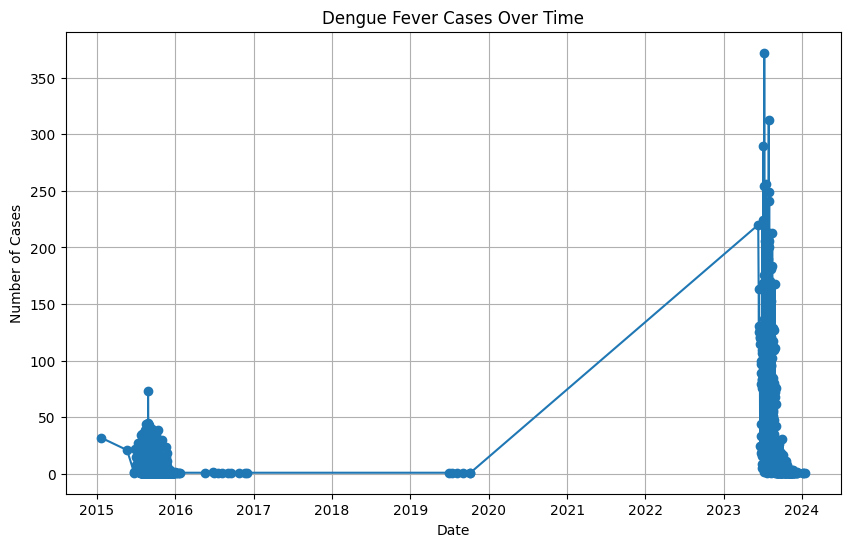

In [12]:
# Convert the diagnosis_date to datetime format
dengue_fever_by_area['diagnosis_date'] = pd.to_datetime(dengue_fever_by_area['diagnosis_date'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(dengue_fever_by_area['diagnosis_date'], dengue_fever_by_area['cases'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Dengue Fever Cases Over Time')
plt.grid(True)
plt.show()

In [21]:
dengue_fever_by_area.to_csv('datasets/dengue_fever_cases_by_area.csv', index=False, encoding='utf-8')

In [ ]:
dengue_fever_by_area.drop_duplicates(subset=['latitude', 'longitude'], inplace=True)

In [ ]:
dengue_fever_by_area.reset_index(drop=True, inplace=True)

In [ ]:
dengue_fever_by_area.duplicated().sum()

NameError: name 'dengue_fever_by_area' is not defined

In [ ]:
dengue_fever_by_area.sort_values(by='diagnosis_date', ascending=True, inplace=True)

In [ ]:
dengue_fever_by_area

,road_name,neighborhood,diagnosis_date,latitude,longitude,administrative_area_code,year,cases
1144,裕文路,文聖里,2015/01/19,22.979000,120.197000,67000320,104,32
2285,和緯路,六甲里,2015/05/21,22.997000,120.198000,67000340,104,21
4893,西門路,六甲里,2015/06/23,23.062000,120.228000,67000340,104,1
4888,西門路,六甲里,2015/06/24,23.062000,120.207000,67000340,104,2
2432,立德十路,大德里,2015/06/26,22.999000,120.228000,67000320,104,22
...,...,...,...,...,...,...,...,...
5433,NaN,楠西里,2023/12/10,23.174337,120.483284,67000240,112,1
5375,NaN,溪美里,2023/12/10,23.155438,120.281559,67000190,112,1
1588,NaN,新東里,2024/01/04,22.986506,120.224947,67000320,113,1
2319,NaN,五條港里,2024/01/06,22.997527,120.196801,67000370,113,1


In [ ]:
sum(dengue_fever_by_area['cases'])

44478

In [ ]:
dengue_fever_by_area.to_csv('datasets/dengue_fever_cases_by_area.csv', index=False, encoding='utf-8')

## Dengue Spray

In [20]:
dengue_spray_count = pd.read_csv('datasets/dengue_spraying.csv')
dengue_spray_count.sort_values(by=['latitude', 'longitude'], inplace=True)

In [21]:
dengue_spray_count

,administrative_area_code,longitude,road_name,date,sprayer,supporting_staff,detective,day_of_week,meeting_location,locksmith,neighborhood,latitude,police_officer,meeting_time,year
1283,67000350,6.256543,NaN,2015/11/03,5,12.0,0.0,二,安和路一段52巷,1.0,安和里B,3.170467,1.0,1330.0,104
2895,67000290,120.346433,NaN,2023/11/22,NaN,NaN,NaN,NaN,NaN,NaN,龜洞里,22.898981,NaN,NaN,112
996,67000280,120.273042,NaN,2015/10/25,17,30.0,1.0,日,長榮大學,1.0,大潭里,22.904069,1.0,1330.0,104
1893,67000280,120.274400,NaN,2019/02/19,6,0.0,0.0,(二),大潭里,0.0,大潭里,22.904400,0.0,1330.0,108
1898,67000270,120.255300,NaN,2019/04/02,5,0.0,0.0,(二),中洲里,1.0,中洲里,22.908600,1.0,830.0,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,67000310,121.235295,NaN,2015/10/24,13,34.0,1.0,六,忠勇街,2.0,中華里,24.843313,1.0,1315.0,104
152,67000370,121.213782,NaN,2015/08/12,5,20.0,2.0,三,民權路三段157號旁風神廟門口,2.0,民權里,24.973934,2.0,845.0,104
753,67000330,121.737799,NaN,2015/10/14,35,72.0,1.0,三,廣州里活動中心(健民街2號),6.0,廣州里,25.142778,5.0,900.0,104
36,67000350,114.867978,NaN,2015/07/18,10,12.0,1.0,六,惠安街,1.0,溪頂里,40.770845,1.0,830.0,104


In [35]:
dengue_spray_count_by_area = dengue_spray_count.copy()
dengue_spray_count_by_area['spray_count'] = dengue_spray_count_by_area.groupby(['latitude', 'longitude'])['latitude'].transform('count')

In [36]:
dengue_spray_count_by_area.drop_duplicates(subset=['latitude', 'longitude'], inplace=True)

In [37]:
dengue_spray_count_by_area.reset_index(drop=True, inplace=True)

In [38]:
dengue_spray_count_by_area.duplicated().sum()

np.int64(0)

In [42]:
dengue_spray_count_by_area.sort_values(by='date', ascending=True, inplace=True)
dengue_spray_count_by_area['spray_count'] = dengue_spray_count_by_area['spray_count'].fillna(0).astype(int)

In [43]:
dengue_spray_count_by_area

,administrative_area_code,longitude,road_name,date,sprayer,supporting_staff,detective,day_of_week,meeting_location,locksmith,neighborhood,latitude,police_officer,meeting_time,year,spray_count,spray_counts
420,67000320,120.241804,NaN,2015/01/21,3,3.0,1.0,三,裕文路,1.0,文聖里,22.982649,1.0,850.0,104,1,1
568,67000320,120.236019,NaN,2015/05/22,4,0.0,0.0,五,裕農路,0.0,後甲,22.988615,0.0,1500.0,104,2,2
1128,67000340,120.210334,NaN,2015/05/24,9,10.0,1.0,日,和緯路二段30巷,1.0,六甲里,23.012061,1.0,800.0,104,4,4
1389,67000350,120.197487,NaN,2015/05/26,2,0.0,1.0,二,安寧街路口,1.0,安富里,23.029038,1.0,830.0,104,1,1
1011,67000340,120.210053,NaN,2015/06/13,8,11.0,2.0,六,公園路,2.0,正覺里,23.006837,2.0,830.0,104,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,67000360,120.167590,NaN,2024/01/09,NaN,NaN,NaN,NaN,NaN,NaN,國平里,22.979372,NaN,NaN,113,1,1
1739,67000010,120.319046,NaN,2024/02/07,NaN,NaN,NaN,NaN,NaN,NaN,王公里,23.316519,NaN,NaN,113,1,1
1738,67000010,120.314000,NaN,2024/04/02,NaN,NaN,NaN,NaN,NaN,NaN,忠政里,23.315579,NaN,NaN,113,1,1
856,67000360,120.161994,NaN,2024/07/06,NaN,NaN,NaN,NaN,NaN,NaN,天妃里,23.000066,NaN,NaN,113,1,1


In [44]:
sum(dengue_spray_count_by_area['spray_count'])

3153

In [45]:
dengue_spray_count_by_area.to_csv('datasets/dengue_spray_count_by_area.csv', index=False, encoding='utf-8')